In [4]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from math import log10
from numpy import array,pi

# Equation of state

In the lectures, you learned about the equation of state (EoS) and how important it is (not only for stellar models). In particular, you discussed the ideal-gas, radiative and electron-degeneracy EoSs. Later in the lecture and during the labs, you will see that the central-density $\rho_\mathrm{c}$, central-temperature $T_\mathrm{c}$ plane describing stellar models is very informative and the aim of this lab is that you get a feeling for which EoS dominates in which parts of the $\rho_\mathrm{c}$-$T_\mathrm{c}$ plane.

Here is a summary of the equation of states that you discussed:
1. **Ideal gas:** Given a chemical composition via the mean molecular weight $\mu$, we have
\begin{align}
P_\mathrm{id} = \frac{k_\mathrm{B}}{\mu m_\mathrm{u}} \rho T.
\end{align}
2. **Photon gas:** For radiation pressure, we have
\begin{align}
P_\mathrm{rad} = \frac{1}{3}aT^4,\quad a=\frac{4\sigma}{c}=\frac{8\pi^5 k_\mathrm{B}^4}{15 h^3 c^3}.
\end{align}
3. **Degenerate-electron gas:** For a certain mean molecular weight per free electron, $\mu_\mathrm{e}$, we have
\begin{align}
P^\mathrm{D}_\mathrm{NR, e} = \frac{h^2}{20 m_\mathrm{e}} \left(\frac{3}{\pi}\right)^{2/3} \frac{1}{m_\mathrm{H}^{5/3}} \left(\frac{\rho}{\mu_\mathrm{e}}\right)^{5/3} = K_\mathrm{e} \left(\frac{\rho}{\mu_\mathrm{e}}\right)^{5/3}.
\end{align}
4. **Fully-relativistic, degenerate-electron gas:** Similarly to the degenerate-electron gas, the pressure is
\begin{align}
P^\mathrm{D}_\mathrm{ER, e} = \frac{h c}{8} \left(\frac{3}{\pi}\right)^{1/3} \frac{1}{m_\mathrm{H}^{4/3}} \left(\frac{\rho}{\mu_\mathrm{e}}\right)^{4/3} = K_\mathrm{e,r} \left(\frac{\rho}{\mu_\mathrm{e}}\right)^{4/3}.
\end{align}

#### Student-report part 1:
Find relations for $\rho$ and $T$ (for fixed $\mu$ and $\mu_\mathrm{e}$) where 

1. $P_\mathrm{id} = P_\mathrm{rad}$,
2. $P_\mathrm{id} = P^\mathrm{D}_\mathrm{NR, e}$,
3. $P_\mathrm{id} = P^\mathrm{D}_\mathrm{ER, e}$ and
4. $P^\mathrm{D}_\mathrm{NR, e} = P^\mathrm{D}_\mathrm{ER, e}$.

For $P_\mathrm{rad} = P^\mathrm{D}_\mathrm{NR, e}$ and $P_\mathrm{rad} = P^\mathrm{D}_\mathrm{ER, e}$, what is the dominant pressure source?

#### Student-report part 2:
In a $\log \rho$-$\log T$ plot, the relations you found in Part 1 are simple straight lines. For a fully ionised gas with $X=0.7$, $Y=0.28$ and $Z=0.02$, plot these lines and indicate in which region which pressure source dominates. For monatomic gases, $\mu \approx A/(Z+1)$ and $\mu_\mathrm{e} \approx A/Z$. For mixtures, the following approximate formulae are useful (they assume that $A/(Z+1)\approx 2$ and $A/Z\approx 2$ for all elements heavier than helium):
\begin{align}
\mu &\approx \left( 2X + \frac{3}{4}Y + \frac{1}{2}Z \right)^{-1}, \\
\mu_\mathrm{e} &\approx \frac{2}{1+X}.
\end{align}

*Hint 1:* In the polytropes lab, you have already seen that there are modules in python that allow you to access various physical constants; in particular, you worked with the `constants` module of `SciPy`. Here, we want to introduce another module, namely the `constants` package within `AstroPy`. In `AstroPy`, you have the advantage that you can convert all constants automatically into CGS units that will be used regularly in this class. Furthermore, `AstroPy` also has astronomical constants such as solar mass, solar radius, solar luminosity, parsec, AU etc. An overview of all available constants can be found [here](https://docs.astropy.org/en/stable/constants). For example, importing `AstroPy`'s `constants` module via `from astropy import constants as const` then allows you to access the speed of light in CGS units as `const.c.cgs`. The only 'drawback' when using constants from `AstroPy` is that they always come with their units (some may say that this is actually an advantage). In this lab, it is recommended to simply work with the numerical value of the constants, which you can access via `const.c.cgs.value`. Otherwise, `AstroPy` will issue a warning, e.g., when taking the logarithm of non-dimensionless numbers.<br />
*Hint 2:* For a nicer representation, you can compute the density dividing non-relativistic from relativistic electron degeneracy pressure (see part 1.4) and ensure a smooth transition between the two regimes in your plot. 

(3, 10.0)

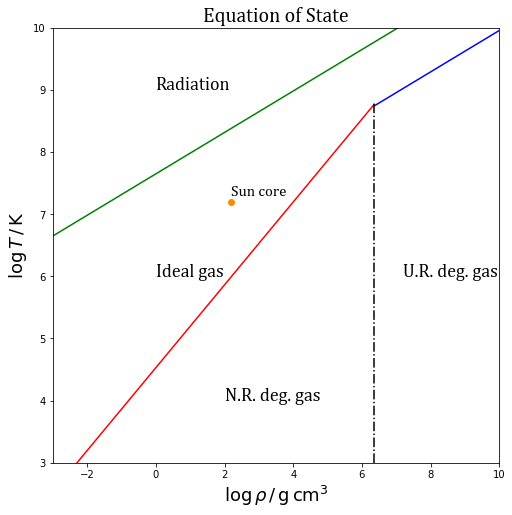

In [67]:
# Your solution here
from math import pi
from astropy.constants import N_A,h,k_B,c,m_e,m_p
from astropy import constants as const
import astropy.units as u

N_A= const.N_A.cgs.value
h=const.h.cgs.value
k_B=const.k_B.cgs.value
c=const.c.cgs.value
m_e=const.m_e.cgs.value
m_p=const.m_p.cgs.value

u=1e-24
mu = (2*0.7+(3/4.0)*0.28+(0.5*0.02))**(-1)
mu_e = 2/(1+0.7)
K_e = h**2/(20*m_e)*(3/pi)**(2./3.)*(1/m_p)**(5./3.)

# example curve (feel free to remove from your final plot)
logRho = np.linspace(-3, 10, 10) # sample 5 points between -1 and 10 in log(rho)
logRho2 = np.linspace(-3, 6.352988505302915,10)
logRho3 = np.linspace(6.352988505302915,10,10)
logT1 = (1/3)*logRho+(1/3)*log10((45*h**3*c**3)/(mu*u*8*pi**5*k_B**3))
logT2 = (2/3)*logRho2+log10((h**2)/(20*m_e)*(3/pi)**(2/3)*1/(m_p)**(5/3)*(u*mu)/(k_B*(mu_e)**(5/3)))
logT3 = 1./3.*logRho3+ log10((h*c/8)*(3/pi)**(1/3)*(1/(m_p)**(4/3))*((u*mu)/(k_B*mu_e**(5/3))))
rho = log10(mu_e*(5*c*m_e/(2*h))**3*(pi/3)*m_p)

plt.figure(figsize=(8,8))
bsfont = {'fontname':'Cambria Math'}

plt.plot(logRho, logT1, ls='-',color='green',label=r'$P_{\rm id}=P_{\rm RAD}$')
plt.plot(logRho2,logT2, ls='-',color='red',label=r'$P_{\rm ID}=P_{\rm NR,e}^{D}$')
plt.plot(logRho3,logT3, ls='-',color='blue',label=r'$P_{\rm ID}=P_{\rm ER,e}^{D}$')
plt.axvline(x=rho,ymax=1/1.21,ls='-.',color='black',label=r'$P_{\rm NR,e}^{D}=P_{\rm ER,e}^{D}$')
plt.scatter(log10(150),log10(1.57e7),c='darkorange') ### plotting central temperature density of the sun
plt.text(2.2,7.3,'Sun core',fontsize=15,**bsfont)
plt.text(0,9,'Radiation',fontsize=18,**bsfont)
plt.text(0,6,'Ideal gas',fontsize=18,**bsfont)
plt.text(2,4,'N.R. deg. gas',fontsize=18,**bsfont)
plt.text(7.2,6,'U.R. deg. gas',fontsize=18,**bsfont)
# axis labels and suggested plot ranges
plt.xlabel(r'$\log\,\rho\,/\,\mathrm{g}\,\mathrm{cm}^{3}$',fontsize=18,**bsfont)
plt.ylabel(r'$\log\,T\,/\,\mathrm{K}$',fontsize=18,**bsfont)
plt.title('Equation of State',fontsize=20,**bsfont)
#plt.legend(loc=4, prop={'size':15})
plt.xlim(-3, 10.0)
plt.ylim(3, 10.0)

